# IS THE AMERICAN POLICE RACIST?


## Introduction

Racist is unfortunately a big part of our modern societies. Racism is defined as "prejudice, discrimination, or antagonism directed against a person or people on the basis of their membership of a particular racial or ethnic group, typically one that is a minority or marginalized".

Racism has permeated all sectors of life and affects the minority groups in different corners. This project is trying to prove the existence of racial injustice in the American Police System. The data used in this research contains information about victims of Fata Police Shootings in America from 2015 to 2020; this data was provided by Center for Disease Control (CDC) and The Federal Bureau of Intelligence (FBI) and downloaded from Kaggle.

This paper is focused on performing exploratory data analyzes to investigate and validate the existence of racial disparity in the use of lethal force by law enforcement officers toward Black or African Americans. The result of the analyzes shows evidence of racial disparity in the use of lethal force by police  that shows a higher proportion of African Americans killed by police officers compared to their white counterparts.

According to the National Population census report of 2019, there are 60.1% White, 18.5% Hispanic, 13.4% Black or African Americans, 5.9% Asians, 1.3% Native Americans, and 0.2%  other races in the United States.

From the fatal police shooting data, 51.2% white suspects and 26.5% black suspects were fatally shot by police across the country in the last five years.
Anyone looking at these numbers would argue that there is no evidence to believe that police officers are racially biased at the shooting of suspects, but digging deeper and comparing racial proportions, we see a clear proof of racial bias in police actions.
 
The question this research seeks to answer is; **Does racial disparity exist in community policing in America?**

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Importing all libraries and tools used in the project**

In [2]:
import pandas as pd   #library for data wrangling
import numpy as np    #library for data wrangling
import matplotlib.pyplot as plt   #library for visualizations
import seaborn as sns    #library for visualizations

from datetime import datetime    #module for working with time data

### Data Dictionary

- id: Case ID
- name: Victim Name
- date: Date of incident
- manner_of_death: Whether the victim was shot/ shot and tasered
- armed: Weapom the victim was carrying, if none; unarmed
- age: Age of Victim
- gender: Sex of Victim
- race: Victim's race. Asian, White, Hispanic, Black, Native American or OTHER races
- city: City where incident happened
- state: State where incident happened
- signs_of_mental_illness: Whether victim showed signs of mental illness or not
- threat_level: Threat posed by the victim
- flee: Whether victim fled or not and the mode of fleeing
- body_camera: Whether or not the body camera of the police officer was on

In [3]:
#option to see all rows of the data
pd.set_option("display.max_rows", 3000)

#import data
shoot = pd.read_csv("fatal-police-shootings-data.csv")
shoot.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## EDA (Exploratory Data Analysis)

In [4]:
#overview of the dataset
shoot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

The dataset contains 5416 rows and 14 columns. The data has some missing values, we'll get a better picture of these soon.

In [5]:
#statistical analysis of the numerical columns in the dataset
shoot.describe()

,id,age
count,5416.000000,5181.000000
mean,3010.398264,37.117931
std,1695.786456,13.116135
min,3.000000,6.000000
25%,1545.750000,27.000000
50%,3009.500000,35.000000
75%,4486.250000,46.000000
max,5927.000000,91.000000


Age is the only numerical column in the dataset, so we can only extract statistical analysis from the age column for now.

- The mean age of all the victims is: 37.1
- The youngest victim was 6 years old
- The oldest victim was 91 years old.

In [6]:
#checking the number of unique values in each column
shoot.nunique()

id                         5416
name                       5206
date                       1844
manner_of_death               2
armed                        93
age                          77
gender                        2
race                          6
city                       2470
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
dtype: int64

One would expect the id and name columns to contain only unique items but that isn't the case for the name column. Duplicated entries would give a false result, so I'll go ahead and find out what is going on.

In [7]:
shoot['name'].value_counts()

TK TK                   187
Michael Johnson           3
Terry Hasty               2
Robert Edwards            2
Benjamin Diaz             2
                       ... 
Lance Light               1
Cedric Jamal Mifflin      1
Zane Anthony James        1
Miguel Espinal            1
BJ Medeiros               1
Name: name, Length: 5206, dtype: int64

In [8]:
shoot[shoot['name'] == 'TK TK']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
932,1074,TK TK,2015-12-10,shot,gun,NaN,M,NaN,Hemet,CA,False,attack,Not fleeing,False
1400,1584,TK TK,2016-06-01,shot,gun,NaN,M,NaN,Phoenix,AZ,False,attack,Not fleeing,False
1422,1615,TK TK,2016-06-09,shot,baton,NaN,M,NaN,Somerton,AZ,False,attack,Not fleeing,False
1503,1685,TK TK,2016-07-04,shot,knife,NaN,M,NaN,Rosser,TX,False,other,Not fleeing,True
1649,1848,TK TK,2016-09-01,shot and Tasered,pipe,NaN,M,H,Huntington Park,CA,False,other,Not fleeing,False
1896,2110,TK TK,2016-12-08,shot,gun,NaN,M,NaN,Allen,TX,False,attack,Not fleeing,False
1923,2141,TK TK,2016-12-20,shot,knife,NaN,M,NaN,Brawley,CA,True,other,Not fleeing,False
1929,2154,TK TK,2016-12-21,shot,knife,NaN,M,NaN,Stockton,CA,False,undetermined,Not fleeing,False
1934,2168,TK TK,2016-12-23,shot,NaN,NaN,M,NaN,El Monte,CA,False,other,Car,False
1951,2182,TK TK,2016-12-30,shot,gun,NaN,M,NaN,Pensacola,FL,False,attack,Not fleeing,False


The name TK TK  appears a lot of times, 187 times in total. From exploring the rows with this name, it appears that TK TK is a placeholder for people whose names were not known.

In [9]:
shoot[shoot['name'] == 'Michael Johnson']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1344,1526,Michael Johnson,2016-05-09,shot,gun,26.0,M,W,Chicago,IL,False,other,Foot,False
1401,1586,Michael Johnson,2016-06-01,shot,gun,21.0,M,B,Newnan,GA,False,attack,Foot,True
3731,4087,Michael Johnson,2018-10-10,shot,knife,26.0,M,NaN,Thousand Oaks,CA,True,other,Not fleeing,True


Looking at the data above, the name Michael Johnson appears more than once in different cities, different race information, Michael Johnson is probably just a common name.

In [10]:
#number of rows and columns in the dataset
shoot.shape

(5416, 14)

## Data Cleaning

The data set would need to be cleaned it contains missing data.

In [11]:
#number of missing values in each column
shoot.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [12]:
#proportion of missing values in a column (in percentage)
shoot.isnull().sum() / shoot.shape[0]  * 100

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
dtype: float64

The dataframe contains 5416 rows and 10 columns. Some columns like:
- armed
- age
- gender
- race
- flee

contain **missing values**. 

Note: The percentage of missing data is less than 5% which has little or no impact on the data if removed. Also most of the missing data are categorical values and must be carefully manipulated in other to maintain the integrity of the analysis.

A decision was made to drop all missing values.

In [13]:
#dropping all missing values
shoot.dropna(inplace=True)

In [14]:
shoot.shape

(4399, 14)

**1017 rows were droped from the dataframe and we now have 4399 rows.**

## Data Analysis and Visualizations


In [15]:
#all the columns in the dataframe
shoot.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

### Date Analysis

Converted the date column to a datetime object and then extracted the year, month and day of the week that each incident happened.

In [16]:
shoot['date'] = pd.to_datetime(shoot['date'])

In [17]:
days = []
months = []
years = []


for date in shoot['date']:
    d = date.strftime('%A')
    m = date.strftime('%B')
    y = date.strftime('%Y')
    
    days.append(d)
    months.append(m)
    years.append(y)
    
shoot['weekday'] = days
shoot['month'] = months
shoot['year'] = years

In [18]:
#number of shootings per year from 2015 - 2020
shoot['year'].value_counts()

2015    895
2016    820
2018    800
2017    784
2019    764
2020    336
Name: year, dtype: int64

In [19]:
#number of shootings monthly
shoot['month'].value_counts()

January      465
March        446
February     419
April        382
July         379
May          378
June         350
August       344
October      335
September    303
December     302
November     296
Name: month, dtype: int64

In [20]:
#number of shootings daily
shoot['weekday'].value_counts()

Wednesday    673
Tuesday      657
Thursday     657
Sunday       619
Monday       610
Friday       597
Saturday     586
Name: weekday, dtype: int64

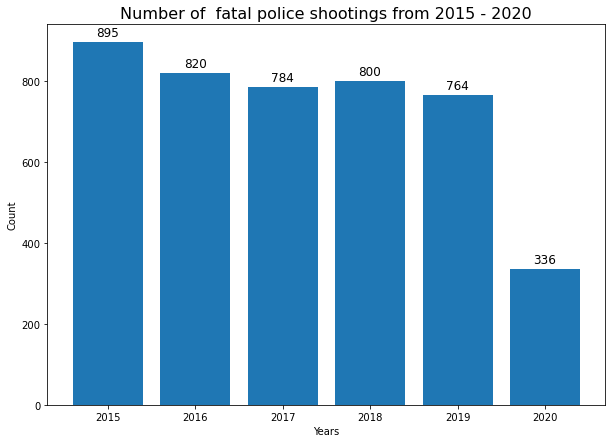

In [21]:
year_df = pd.DataFrame(shoot['year'].value_counts())
year_df = year_df.reset_index()

year_df = year_df.sort_values('index')

fig,ax = plt.subplots(figsize=(10,7))
rects1 = plt.bar(x='index', height='year', data=year_df)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',  fontsize=12)
autolabel(rects1)

plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Number of  fatal police shootings from 2015 - 2020', fontsize=16)
plt.show()

The total number of victims - after data cleaning - over a five year period, is **4399**

**The chart above shows a steady decline in the number of shootings incidents in the United States in the last five years with a slight increase only in 2018.The year 2020 shows a drastic decline in the number of shooting cases compared to previous years for two possible reasons: Temporary national lockdown of work and normal business activities due to the global Covid-19 pandemic and the fact that as of the time of this report, the year 2020 hasn't ended.**

### Age Analysis

In [22]:
max_age = shoot['age'].max()
max_age

91.0

In [23]:
min_age = shoot['age'].min()
min_age

6.0

In [24]:
shoot[(shoot['age'] == min_age) | (shoot['age'] == max_age)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday,month,year
833,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True,Tuesday,November,2015
2162,2407,Frank W. Wratny,2017-03-08,shot,gun,91.0,M,W,Union Township,PA,False,attack,Not fleeing,False,Wednesday,March,2017
2908,3229,Kameron Prescott,2017-12-21,shot,unarmed,6.0,M,W,Schertz,TX,False,other,Not fleeing,False,Thursday,December,2017


**The youngest victims shot by the police were 6 years old, while the oldest victim is 91 years old. The 6 year old were white boys and unarmed and didn't attack the police and based on this anotaion, it can be said that the 6-year old victims did not pose any imminent threat to the Police officers, on the other hand, the 91-year old white male suspect was reported to be armed, and attacked the police officer**

Text(0.5, 1.0, 'Distribution of the age of the Victims')

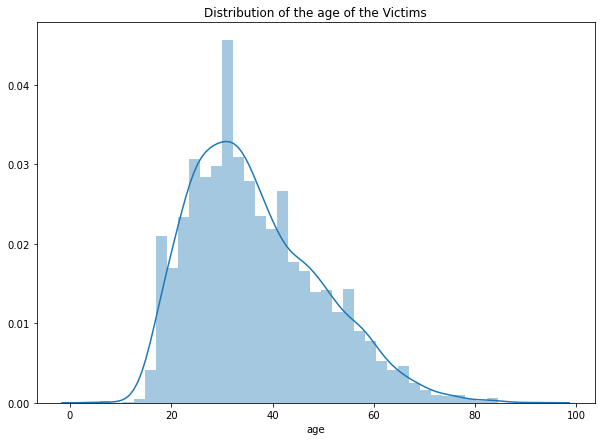

In [25]:
plt.figure(figsize=(10, 7))

sns.distplot(shoot['age'])

plt.title('Distribution of the age of the Victims')

**As depicted in the chart above, the average age of suspects fatally shoot by police is 36 and Suspects aged 25 were the highest number of victims**

In [26]:
print('The mean age of the victims is: ', round(shoot['age'].mean(), 1))

The mean age of the victims is:  36.6


In [27]:
shoot['age'].mode()

0    25.0
dtype: float64

### Gender Analysis

In [28]:
shoot['gender'].value_counts()

M    4202
F     197
Name: gender, dtype: int64

In [29]:
shoot['gender'].value_counts(normalize=True) * 100
### the analysis shows a much higher number of the susepct killed were male ninety five percent

M    95.521709
F     4.478291
Name: gender, dtype: float64

In [30]:
gender_df = pd.DataFrame(shoot['gender'].value_counts())
gender_df.reset_index(inplace=True)
gender_df

,index,gender
0,M,4202
1,F,197


95.52171230316162
4.478290677070618


([<matplotlib.patches.Wedge at 0x1dcde1a8d08>,
 [Text(-1.089131491612667, 0.15424848128123386, 'Male'),
  Text(1.0891315060544473, -0.15424837930938382, 'Female')],
 [Text(-0.5940717226978183, 0.08413553524430936, '95.5217%\n(4202)'),
  Text(0.5940717305751531, -0.08413547962330024, '4.4783%\n(197)')])

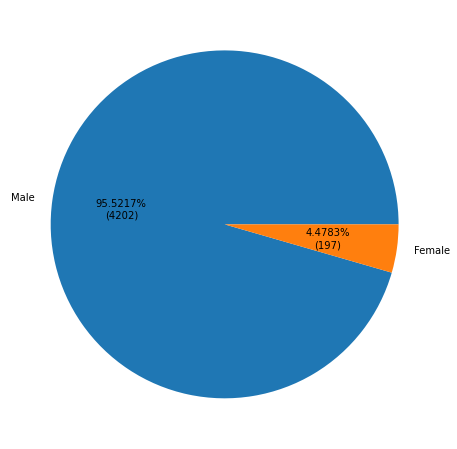

In [31]:
def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, 4399*x/100)


fig = plt.figure(figsize=(8, 8))
plt.pie(gender_df['gender'], labels=['Male', 'Female'], autopct=my_fmt)

**Majority of the victims are male, constituting over 95% of the data**

### Race Analysis

The race column has 6 unique values:

- A: Asian
- W: White
- H: Hispanic
- B: Black
- O: Others
- N: Native American

In [32]:
shoot['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [33]:
shoot['race'].value_counts()

W    2253
B    1164
H     786
A      83
N      70
O      43
Name: race, dtype: int64

In [34]:
#proportion of victims by race
shoot['race'].value_counts(normalize=True) * 100

W    51.216185
B    26.460559
H    17.867697
A     1.886792
N     1.591271
O     0.977495
Name: race, dtype: float64

The statistics above shows the numbers of victims fatally shot by police officers with the following key obervations:
The number of White victims shot are twice the number of Black victims shot. By literally "comparing how many or how often white people are killed by police to how many or how often black people are killed by the police is statistically dubious unless you first adjust for population". 
To avoid a misleading and inaccurate conclusions, this project took into account the actual proportion of poeple representated these differnt races in the population.

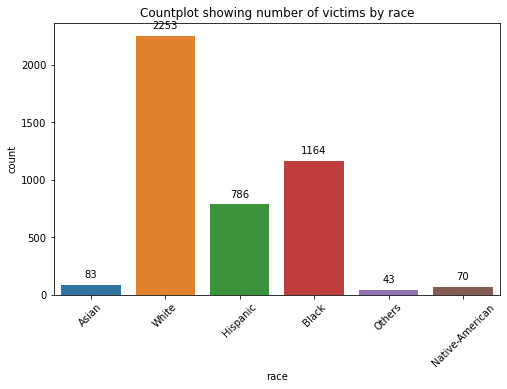

In [35]:
#PLOT 1

fig, ax = plt.subplots(figsize=(8,5))
splot = sns.countplot(x='race', data=shoot)

ax.set_title('Countplot showing number of victims by race')
ax.set_xticklabels(['Asian', 'White', 'Hispanic', 'Black', 'Others', 'Native-American'], rotation=45)


for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')

**This plot shows the number of victims by race**

In [36]:
#from census data as of july 2019
total_num_killed = 4399

race_percent = np.array([5.9, 60.1, 18.5, 13.4, 0.2, 1.3])
race_prop = race_percent / 100
races = ['A', 'W', 'H', 'B', 'O', 'N']

estimate_df = pd.DataFrame({'index':races, 'estimated fatality by racial proportion': race_prop * total_num_killed})

In [37]:
new = pd.DataFrame(shoot['race'].value_counts())
new = new.reindex(['A', 'W', 'H', 'B', 'O', 'N'])
new = new.reset_index()
new = new.rename(columns={'race':'number of people killed'})

print('The dataframe below shows the number of people killed per race and the estimated fatality per racial proportion')
pd.merge(new, estimate_df, how='inner', on='index')

The dataframe below shows the number of people killed per race and the estimated fatality per racial proportion


,index,number of people killed,estimated fatality by racial proportion
0,A,83,259.541
1,W,2253,2643.799
2,H,786,813.815
3,B,1164,589.466
4,O,43,8.798
5,N,70,57.187


Text(0.5, 1.0, 'Distribution of Police Shootings by Race')

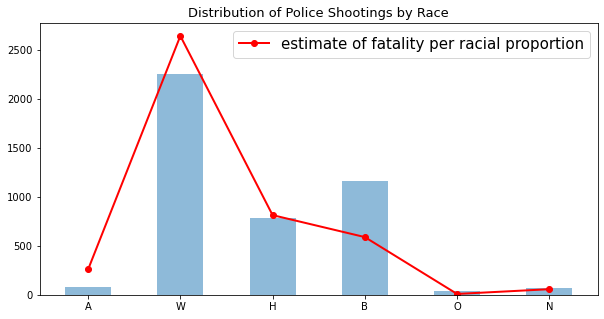

In [38]:
#PLOT 2

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(new['index'], new['number of people killed'], alpha=0.5, width=0.5)
ax.plot(races, race_prop*shoot.shape[0], marker='o', color='r', label='estimate of fatality per racial proportion', lw = 2, markersize=6)

plt.legend(fontsize=15)
ax.set_title('Distribution of Police Shootings by Race', fontsize=13)

#### This plot compares the racial proportions of the victims with the race propoprtions of the United States population using the 2019 census data.

- The red line plot shows the expected proportion of shootings per race if members of that race were shot according to their proportion in the population.
- The blue bar plots show the number of people that were fatally shot by the police by race.

If members of each race were shot according to their proportion in the population, the red line plot shows how many victims we should have had for each race.

A key take away as depicted in the chart is the percentage of black victims shot by the police being at 25% which is approximately double their population according to the census report.

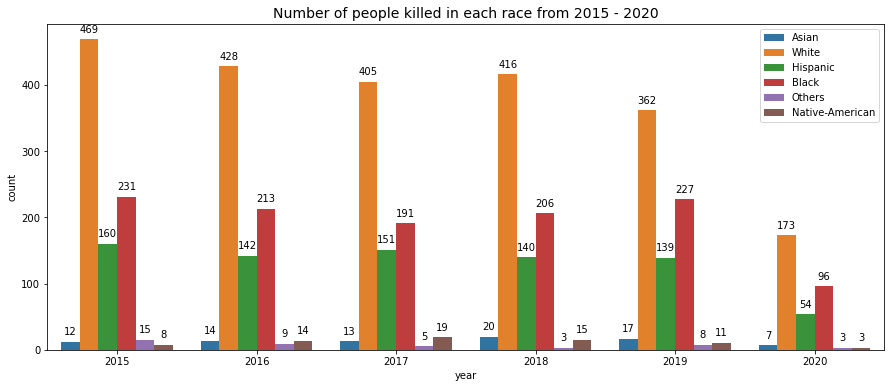

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))

splot = sns.countplot(x='year',hue='race', data=shoot)

plt.title('Number of people killed in each race from 2015 - 2020', fontsize=14)
ax.legend(labels=['Asian', 'White', 'Hispanic', 'Black', 'Others', 'Native-American'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [40]:
total_pop_us_2019 = 328239523

num_black = 13.4 * total_pop_us_2019
num_white = 60.1 * total_pop_us_2019


percent_killed_black = (1164 / num_black) * 100
percent_killed_white = (2253/ num_white) * 100


print('Black people are {} more likely to be killed than their white counterparts'.format(round(percent_killed_black / percent_killed_white, 1)))

Black people are 2.3 more likely to be killed than their white counterparts


### Level of threat posed by the victims

There's a column in the data that describes the level of threat posed by the victim to the police officer(s). It contain three categories; Attack, other and undetermined. It doesn't give a lot of information, but I went ahead to see the threat level of the victims by race.

From the plot below, the police apparently felt threatened by most of the victims.

[Text(0, 0, 'Asian'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Native-American')]

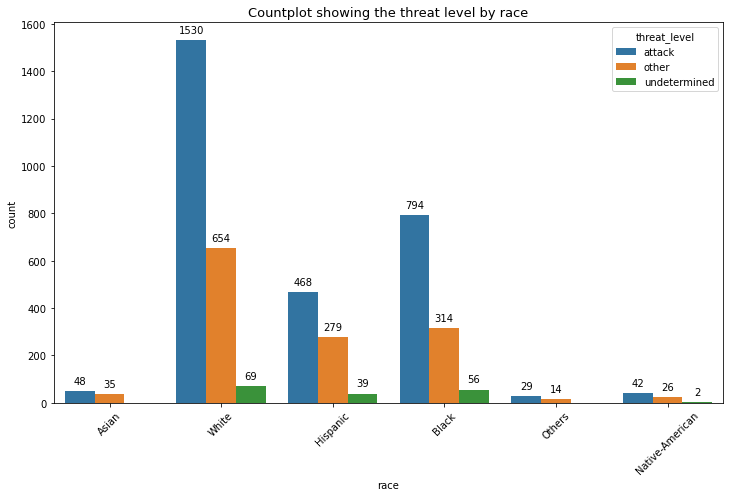

In [41]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x='race', hue='threat_level', data=shoot)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set_title('Countplot showing the threat level by race', fontsize=13)
ax.set_xticklabels(['Asian', 'White', 'Hispanic', 'Black', 'Others', 'Native-American'], rotation=45)

### Victim's Location Analysis

In [42]:
shoot['state'].nunique()

51

In [43]:
state_vc = shoot['state'].value_counts()
state_vc  

CA    623
TX    383
FL    294
AZ    200
CO    153
GA    146
NC    137
OK    137
OH    133
TN    114
WA    113
MO    112
IL     88
LA     87
IN     87
PA     86
VA     85
AL     85
NY     85
WI     82
NM     81
NV     76
KY     73
SC     71
MI     67
OR     67
MD     66
AR     64
MN     56
UT     54
MS     52
NJ     52
KS     46
WV     37
ID     34
AK     33
MA     30
IA     29
HI     23
MT     22
NE     22
ME     17
CT     17
SD     13
WY     13
DC     13
NH     12
ND     10
DE      9
VT      8
RI      2
Name: state, dtype: int64

Text(0.5, 1.0, 'Number of police killings, by states')

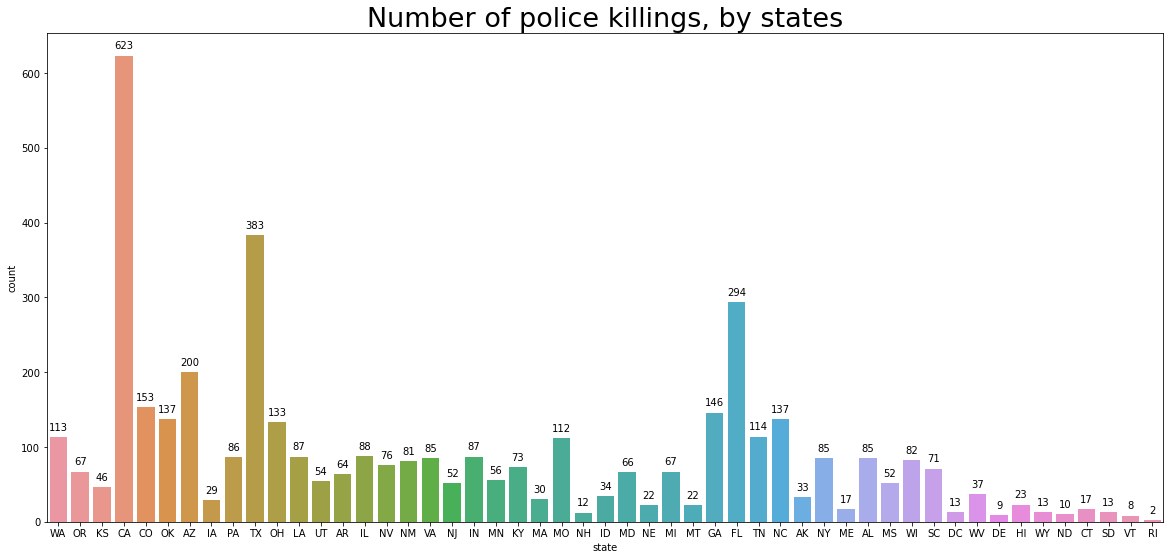

In [44]:
plt.figure(figsize=(20,9))

ax = sns.countplot(data=shoot, x='state')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Number of police killings, by states", fontsize=27)
##The chart below shows the number of fatality in police shootings across the country

A key observation from the "Number of police killings, by states" chart is the magnitude of deaths attributed to the three most populated states (Califonia (CA),Texas (TX) and FLorida(FL)) having the highest population density in the United States and the lowest number of cases in Rhode Island (RI) with only 2 cases. I wonder what those people did!. 

While population density might be a reason for higher number of police shooting incidents, I do not think it is the only reason. To try to confirm this, I'll compare the percentage of the number of victims in the 20 states with the highest number of victims, with the population percentage of these states using the 2019 US population data.

In [45]:
#top twenty states

vc= shoot['state'].value_counts(normalize=True)*100.
top_twt_state= pd.DataFrame(vc.head(20))
top_twt_state = top_twt_state.reset_index()
top_twt_state = top_twt_state.rename(columns={'index':'state', 'state':'count'})
top_twt_state['state_full'] = ['California', 'Texas', 'Florida', 'Arizona', 'Colorado', 'Georgia', 'North Carolina', 'Oklahoma',
                              'Ohio', 'Tennessee', 'Washington', 'Missouri', 'Illinois', 'Indiana', 'Louisiana', 'Pennsylvania',
                               'Virginia', 'New York', 'Alabama', 'Wisconsin'] 
top_twt_state

,state,count,state_full
0,CA,14.162310,California
1,TX,8.706524,Texas
2,FL,6.683337,Florida
3,AZ,4.546488,Arizona
4,CO,3.478063,Colorado
5,GA,3.318936,Georgia
6,NC,3.114344,North Carolina
7,OK,3.114344,Oklahoma
8,OH,3.023414,Ohio
9,TN,2.591498,Tennessee


In [46]:
total_pop = 328239523  #2019
state_df = pd.read_html('https://worldpopulationreview.com/states#statesTable')
state_df = state_df[0]
state_df = state_df.set_index('State')
state_df = state_df.loc[['California', 'Texas',  'Florida', 'Arizona', 'Colorado', 'Georgia','North Carolina',
                        'Oklahoma','Ohio','Tennessee','Washington','Missouri','Illinois','Indiana','Louisiana',
                        'Pennsylvania','Virginia','New York','Alabama','Wisconsin']]

state_df = state_df.reset_index()
state_df = state_df[['State', '2020 Pop.']]
state_df = state_df.head(20)

state_df['percent_by_state'] = (state_df['2020 Pop.']/total_pop) * 100
state_df

,State,2020 Pop.,percent_by_state
0,California,39937500,12.167182
1,Texas,29472300,8.978900
2,Florida,21993000,6.700290
3,Arizona,7378490,2.247898
4,Colorado,5845530,1.780873
5,Georgia,10736100,3.270813
6,North Carolina,10611900,3.232974
7,Oklahoma,3954820,1.204858
8,Ohio,11747700,3.579002
9,Tennessee,6897580,2.101386


Comparing the percentages of the victims with the percentage population in 20 states


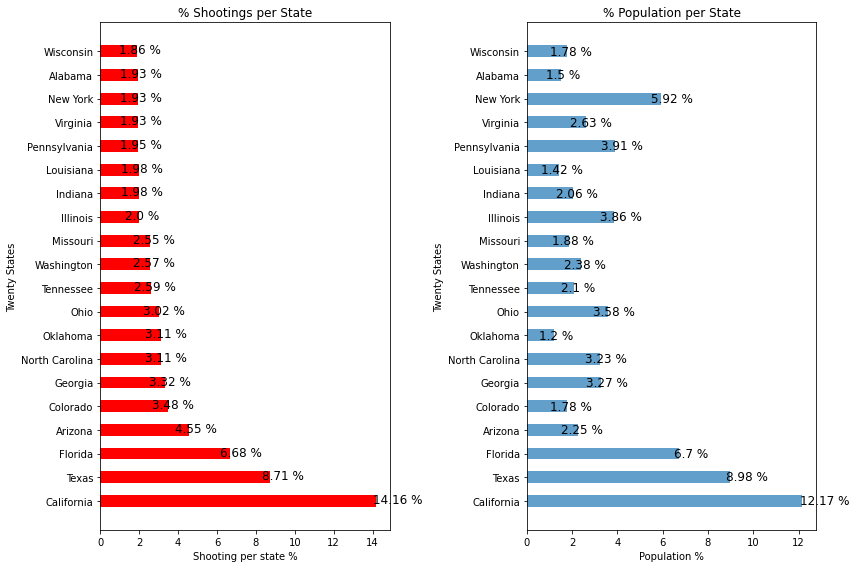

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

rects1 = axes[0].barh(y=top_twt_state['state_full'], width=top_twt_state['count'], height=0.5, color='r')
rects2 = axes[1].barh(y=state_df['State'], width=state_df['percent_by_state'], height=0.5, alpha=0.7)

axes[0].set_xlabel('Shooting per state %')
axes[0].set_ylabel('Twenty States')
axes[0].set_title('% Shootings per State')

axes[1].set_xlabel('Population %')
axes[1].set_ylabel('Twenty States')
axes[1].set_title('% Population per State')

for r in rects1:
    width = r.get_width()
    axes[0].text(1.08*r.get_width(), r.get_y()+0.6*r.get_height(), '{} %'.format(round(width, 2)), ha='center', va='center', fontsize=12)
  
for r in rects2:
    width = r.get_width()
    axes[1].text(1.08*r.get_width(), r.get_y()+0.5*r.get_height(),'{} %'.format(round(width, 2)), ha='center', va='center', fontsize=12)
    
plt.tight_layout()
print('Comparing the percentages of the victims with the percentage population in 20 states')
plt.show()

California, Texas and Florida are three states in the nation with the highest number of fatal police shootings, something to note also for these three states is that they are the most populous states in the United States. the question that can be gathered from the charts above is:

**Are high rate of fatal police shootings as a result of the states population density?**
 

To answer the question, by comparing the "Percentage of fatal shooting per state" and "Percent population per state", it can be observed while there seem to be a conmensurate number of shooting for CA, TX, and FL, the same fact does not hold for the state of New York which despite its large population has low proportion of fatal police shooting.

The  bar charts above showing the state population and the number of fatal police shooting has led to a conclusion that population density is not the only factor determining the rate of police shootings. 

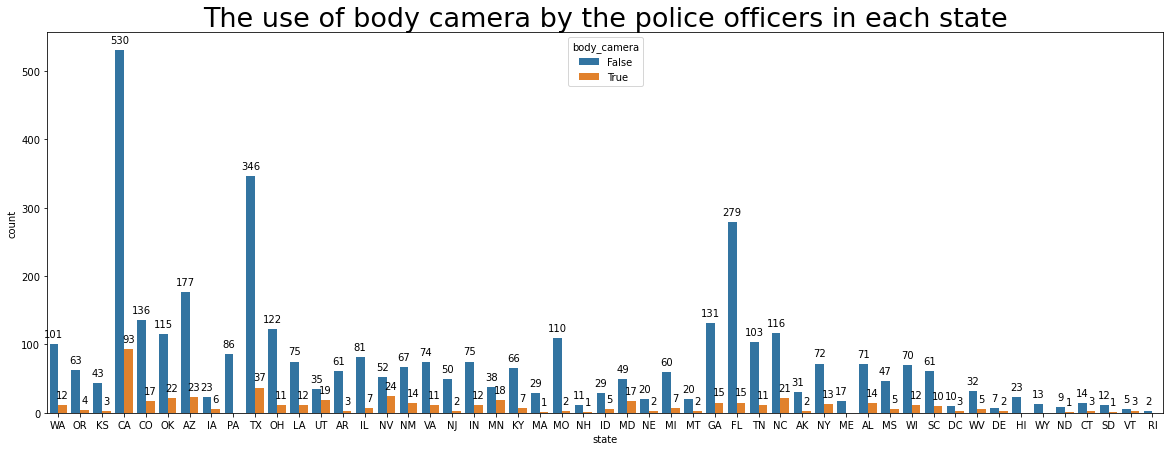

In [48]:
#body camera by state
plt.figure(figsize=(20, 7))
ax = sns.countplot(data=shoot, x='state', hue='body_camera')
plt.title('The use of body camera by the police officers in each state', fontsize=27)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [49]:
shoot['body_camera'].value_counts(normalize=True) * 100

False    87.951807
True     12.048193
Name: body_camera, dtype: float64

**More than 87% of the police officers did not turn on their body cameras during the incident**

This should definitely by addressed by the government, body cameras should not be turned off.

###  City Analysis of Fatal Police Shootings

In [50]:
shoot['city'].value_counts().head(20)

Los Angeles      62
Phoenix          60
Houston          45
Las Vegas        38
San Antonio      34
Columbus         33
Chicago          31
Jacksonville     30
St. Louis        29
Albuquerque      28
Austin           27
Oklahoma City    26
Kansas City      26
Miami            22
Denver           22
Bakersfield      21
New York         21
Tucson           20
Baltimore        19
Mesa             19
Name: city, dtype: int64

**The analysis presented above shows Los Angeles and Phoenix having the highest numbers of fatal police shootings in the last 5 years.**

### Weapon analysis

In [51]:
#total ways of being armed
shoot['armed'].nunique()

90

In [52]:
#10 most common ways of being armed
shoot['armed'].value_counts()

gun                                 2596
knife                                660
unarmed                              336
toy weapon                           165
vehicle                              117
undetermined                         113
unknown weapon                        57
machete                               38
Taser                                 23
sword                                 21
baseball bat                          16
ax                                    16
hammer                                13
gun and knife                         13
metal pipe                            12
screwdriver                           11
sharp object                          11
box cutter                            11
hatchet                               10
gun and vehicle                       10
gun and car                            9
scissors                               7
rock                                   6
meat cleaver                           5
shovel          

I did not expect to see these many different types of weapons. Overall, majority of the victims were in possession of a gun or knife and 336 people were completely unarmed!.

People that had toy weapons? What's going on there?

Also, what does 'undetermined' weapon mean?

In [64]:
#toy = shoot[shoot['armed'] == 'toy weapon']
toy['age'].min()

13.0

The youngest person with a toy gun was 13 years old.

Text(0.5, 1.0, 'Most common ways of being armed')

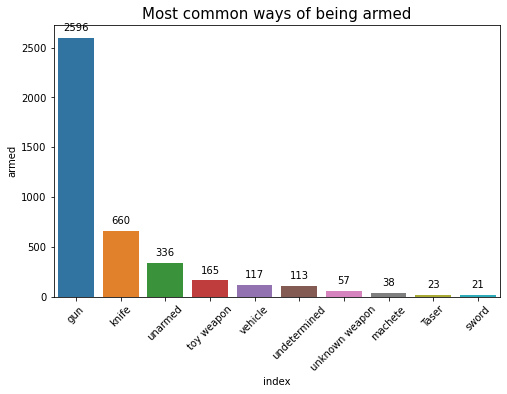

In [54]:
armed_grp = pd.DataFrame(shoot['armed'].value_counts().head(10))
armed_grp = armed_grp.reset_index()
armed_grp

plt.figure(figsize=(8,5))
ax = sns.barplot(data=armed_grp, x='index', y='armed')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set_xticklabels(labels =armed_grp['index'], rotation = 45)
ax.set_title("Most common ways of being armed", fontsize=15)

**There were over 2500 of the suspects who had guns on them, and a total of 336 suspects were unarmed**

#### A little data preprocessing of the weapon column

I converted values in the weapon column to two categories; Armed and Unarmed. 

In [55]:
#map armed
def arm(df, col):
    ar = []
    for w in df[col]:
        if w == 'unarmed':
            ar.append('unarmed')
            
        else:
            ar.append('armed')
            
    return ar

In [56]:
new = shoot
new['armed']  = arm(shoot, 'armed')

new['armed'].value_counts()

armed      4063
unarmed     336
Name: armed, dtype: int64

Text(0.5, 1.0, 'The Level of threat posed by people that were either armed or unarmed')

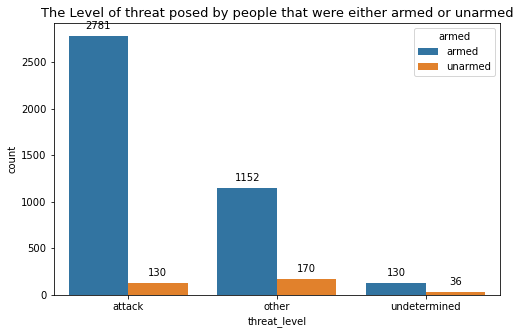

In [57]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='threat_level', hue='armed', data=new)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.title('The Level of threat posed by people that were either armed or unarmed', fontsize=13)

**Checking the number of people that were armed and also attacked the police**

In [58]:
#Number of people that were armed and attacked the police officer
armed_attack = new[(new['armed'] == 'armed') & (new['threat_level'] == 'attack')]

armed_attack.shape[0]

2781

In [59]:
(armed_attack.shape[0] /new.shape[0]) * 100

63.21891338940668

**2781 (63%) victims were armed with some type of weapon and also attacked the police officer**

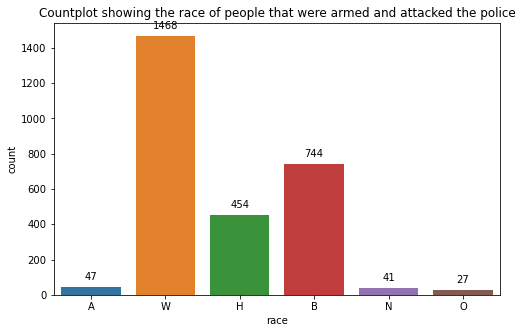

In [60]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='race',  data=armed_attack)

plt.title('Countplot showing the race of people that were armed and attacked the police')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')

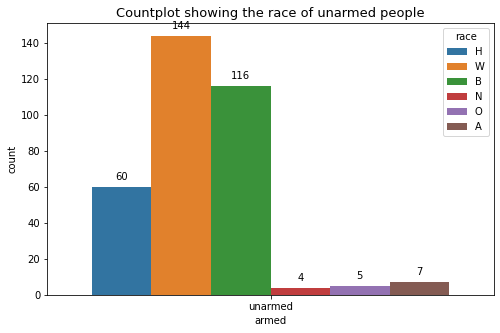

In [61]:
unarmed_df = shoot[shoot['armed'] == 'unarmed']

plt.figure(figsize=(8,5))
ax = sns.countplot(x='armed', hue='race', data=unarmed_df)

plt.title('Countplot showing the race of unarmed people', fontsize=13)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### Assuming that people that were unarmed and didn't attack the police were innocent

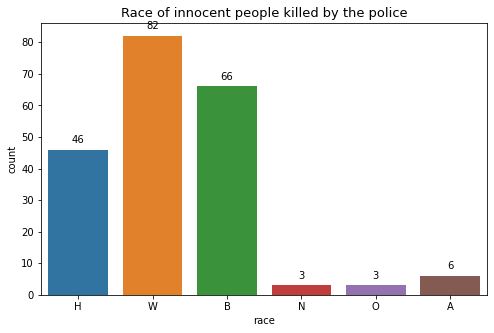

In [62]:
innocent_df = unarmed_df[unarmed_df['threat_level'] != 'attack']

plt.figure(figsize=(8,5))
ax = sns.countplot(x='race', data=innocent_df)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')


    plt.title('Race of innocent people killed by the police', fontsize=13)

In [63]:
#racial proportion of the people assumed to be innocent

innocent_df['race'].value_counts(normalize=True) * 100

W    39.805825
B    32.038835
H    22.330097
A     2.912621
O     1.456311
N     1.456311
Name: race, dtype: float64

**336 unarmed people were killed by the police.**


As usual, majority of them were white, but something has changed here; the proportion of innocent black people killed is now very high and is very close to the proportion of innocent white people. This is definitely more proof of racial disparity

## Conclusion

By computing the proportion of black suspects killed by police officers versus white suspects killed by police officers, the analysis shows a higher proportion of black people killed than the proportion of white people killed. 
The analysis showed that Black people are 2.63 times more likely to be killed than their white counterpart.

Given this information, the result of the report suggest racial bias in police intervention, by taking into account the proportion of fatal police shooting in minority communities (Blacks and others) and comparing the proportion to majority communities (Whites).

It is recommended that police departments across the country invest more in de-escalation technique and less use of lethal force bearing in mind that all human lives are sacred and all men created equal and desserves a second chance to live.


## Limitations:

There were significant and valuable information that were not included in the dataset used. Some of these information are and not limited to:

- The reason for police intervention.
- Information on "undertermined threat level" column.
- If the weapons were actually being used against the police officer or not.